In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [3]:
num_epochs = 4
batch_size = 4
learning_rate = 0.001

In [4]:
transform = transforms.Compose(
    [transforms.ToTensor(), 
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]
)

In [5]:
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

Files already downloaded and verified
Files already downloaded and verified


In [6]:
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [7]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [8]:
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

In [9]:
# get some random training images
dataiter = iter(train_loader)
images, labels = next(dataiter)

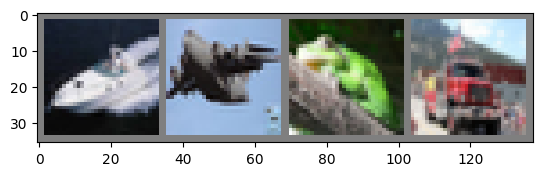

In [10]:
# show images
imshow(torchvision.utils.make_grid(images))

In [11]:
conv1 = nn.Conv2d(3, 6, 5)
pool = nn.MaxPool2d(2, 2)
conv2 = nn.Conv2d(6, 16, 5)

In [12]:
print(images.shape)  # batch_size is 4, 3 - color channels, 32*32 - image size

torch.Size([4, 3, 32, 32])


In [13]:
x = conv1(images)
print(x.shape)

torch.Size([4, 6, 28, 28])


In [14]:
x = pool(x)
print(x.shape)

torch.Size([4, 6, 14, 14])


In [15]:
x = conv2(x)
print(x.shape)

torch.Size([4, 16, 10, 10])


In [16]:
x = pool(x)
print(x.shape)

torch.Size([4, 16, 5, 5])
